## 1. Extract-Transform-Load (ETL) 

In [84]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load csv file

In [85]:
df = pd.read_csv("ndtv_data_final.csv")

#### Preview the dataframe

In [86]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [87]:
print(f"Dataframe shape: {df.shape}\n")
print(f"Columns: {df.columns}\n")

Dataframe shape: (1359, 22)

Columns: Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')



## 2. Exploratory Data Analysis (EDA)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [89]:
df.describe()

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


### 2.1 Renaming some of the columns for easy handling

In [90]:
df = df.rename(
    columns = {'Battery capacity (mAh)': 'battery_cap',
               'Screen size (inches)' : 'screen_size',
               'Resolution x' : 'res_x',
               'Resolution y' : 'res_y',
               'RAM (MB)' : 'RAM',
               'Internal storage (GB)' : 'int_storage',
               'Rear camera' : 'rear_cam',
               'Front camera' : 'front_cam',
               'Operating system' : 'OS',
               'Number of SIMs' : 'SIM_count',
               '4G/ LTE' : '4G_LTE'}
)

In [91]:
print(f"Columns: {df.columns}")

Columns: Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'battery_cap', 'screen_size',
       'Touchscreen', 'res_x', 'res_y', 'Processor', 'RAM', 'int_storage',
       'rear_cam', 'front_cam', 'OS', 'Wi-Fi', 'Bluetooth', 'GPS', 'SIM_count',
       '3G', '4G_LTE', 'Price'],
      dtype='object')


### 2.2 Investigating the columns

In [92]:
# Investigting column 'Unnamed: 0'

n = len(pd.unique(df['Unnamed: 0']))
print(f"Number of unique valus in column 'Unnamed: 0' {n}")

# Note : 'Unnamed: 0' is a running number like an index number. 
#        Therefore this column be dropped from the dataset'

Number of unique valus in column 'Unnamed: 0' 1359


In [93]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.columns

Index(['Name', 'Brand', 'Model', 'battery_cap', 'screen_size', 'Touchscreen',
       'res_x', 'res_y', 'Processor', 'RAM', 'int_storage', 'rear_cam',
       'front_cam', 'OS', 'Wi-Fi', 'Bluetooth', 'GPS', 'SIM_count', '3G',
       '4G_LTE', 'Price'],
      dtype='object')

In [94]:
# Investigting column 'Name'       
n = len(pd.unique(df['Name']))
print(f"Number of unique valus in column 'Name' {n}")   

# Note : Number of unique values in 'Name' = number of entries. 
#        This is also not a usful column in traning the model. Thus will be dropped.

Number of unique valus in column 'Name' 1359


In [95]:
df.drop('Name', inplace=True, axis=1)
df.columns

Index(['Brand', 'Model', 'battery_cap', 'screen_size', 'Touchscreen', 'res_x',
       'res_y', 'Processor', 'RAM', 'int_storage', 'rear_cam', 'front_cam',
       'OS', 'Wi-Fi', 'Bluetooth', 'GPS', 'SIM_count', '3G', '4G_LTE',
       'Price'],
      dtype='object')

In [96]:
# Investigting column 'Brand'       
n = len(pd.unique(df['Brand']))
print(f"Number of unique valus in column 'Brand' {n}")  

#Unique brands
df['Brand'].unique()

Number of unique valus in column 'Brand' 76


array(['OnePlus', 'Realme', 'Apple', 'LG', 'Samsung', 'Asus', 'Xiaomi',
       'Oppo', 'Huawei', 'Google', 'Nokia', 'HTC', 'Motorola', 'Honor',
       'Yu', 'Poco', 'Vivo', 'Nubia', 'Black Shark', 'Infinix', 'Lenovo',
       'Sony', 'Jio', 'Coolpad', 'Micromax', 'Smartron', 'LeEco',
       'BlackBerry', 'Gionee', 'Meizu', 'Panasonic', 'Tecno', 'InFocus',
       'Itel', '10.or', 'Lava', 'Cat', 'Lyf', 'Intex', 'Xolo', 'Acer',
       'Phicomm', 'Karbonn', 'Spice', 'iVoomi', 'Kult', 'Nuu Mobile',
       'Ziox', 'Zopo', 'ZTE', 'Onida', 'Microsoft', 'iBall', 'Mobiistar',
       'Comio', 'Videocon', 'Alcatel', 'Reach', 'Zen', 'Tambo', 'Razer',
       'Homtom', 'Lephone', 'Aqua', 'Celkon', 'Jivi', 'Billion', 'Swipe',
       'M-tech', 'Sansui', 'Zuk', 'TCL', 'mPhone', 'Blu', 'HP', 'Philips'],
      dtype=object)

In [97]:
# Investigting column 'Model'       
n = len(pd.unique(df['Model']))
print(f"Number of unique valus in column 'Model' {n}")  

#Unique Model
df['Model'].unique()


Number of unique valus in column 'Model' 1321


array(['7T Pro McLaren Edition', 'X2 Pro', 'iPhone 11 Pro Max', ...,
       'Aqua Y4', 'Andi4 B20', 'Andi Avonte 5'], dtype=object)

In [98]:
# Investigting column 'Touchscreen'       
n = len(pd.unique(df['Touchscreen']))
print(f"Number of unique valus in column 'Touchscreen' {n}")  

# Unique Model
df['Touchscreen'].unique()

# Note: Touchscreen has only two unique values.
#       Thus convert the values using label encoding
#       {Yes = 1, No = 0}


Number of unique valus in column 'Touchscreen' 2


array(['Yes', 'No'], dtype=object)

In [99]:
# Investigting column 'OS'       
n = len(pd.unique(df['OS']))
print(f"Number of unique valus in column 'OS' {n}")  

# Unique Model
df['OS'].unique()

# Note: 



Number of unique valus in column 'OS' 7


array(['Android', 'iOS', 'Cyanogen', 'BlackBerry', 'Windows', 'Tizen',
       'Sailfish'], dtype=object)

In [100]:
# Investigting column 'Wi-Fi'       
n = len(pd.unique(df['Wi-Fi']))
print(f"Number of unique valus in column 'Wi-Fi' {n}")  

# Unique Model
df['Wi-Fi'].unique()

# Note: Wi-Fi has only two unique values.
#       Thus convert the values using label encoding
#       {Yes = 1, No = 0}

Number of unique valus in column 'Wi-Fi' 2


array(['Yes', 'No'], dtype=object)

In [101]:
# Investigting column 'Bluetooth'       
n = len(pd.unique(df['Bluetooth']))
print(f"Number of unique valus in column 'Bluetooth' {n}")  

# Unique Model
df['Bluetooth'].unique()

# Note: Bluetooth has only two unique values.
#       Thus convert the values using label encoding
#       {Yes = 1, No = 0}

Number of unique valus in column 'Bluetooth' 2


array(['Yes', 'No'], dtype=object)

In [102]:
# Investigting column 'GPS'       
n = len(pd.unique(df['GPS']))
print(f"Number of unique valus in column 'GPS' {n}")  

# Unique Model
df['GPS'].unique()

# Note: GPS has only two unique values.
#       Thus convert the values using label encoding
#       {Yes = 1, No = 0}

Number of unique valus in column 'GPS' 2


array(['Yes', 'No'], dtype=object)

In [103]:
# Investigting column '3G'       
n = len(pd.unique(df['3G']))
print(f"Number of unique valus in column '3G' {n}")  

# Unique Model
df['3G'].unique()

# Note: 3G has only two unique values.
#       Thus convert the values using label encoding
#       {Yes = 1, No = 0}

Number of unique valus in column '3G' 2


array(['Yes', 'No'], dtype=object)

In [104]:
# Investigting column '4G_LTE'       
n = len(pd.unique(df['4G_LTE' ]))
print(f"Number of unique valus in column '4G_LTE'  {n}")  

# Unique Model
df['4G_LTE' ].unique()

# Note: '4G_LTE'  has only two unique values.
#       Thus convert the values using label encoding
#       {Yes = 1, No = 0}                   

Number of unique valus in column '4G_LTE'  2


array(['Yes', 'No'], dtype=object)

### 2.3 Univariate analysis
- countplot - discreate
- distplot - continuous

#### countplot - for discrete features

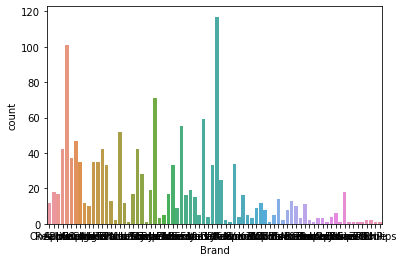

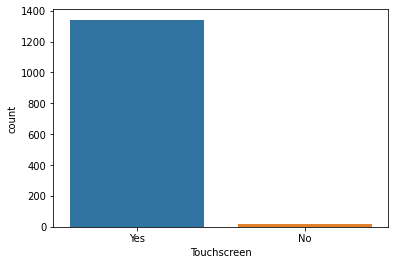

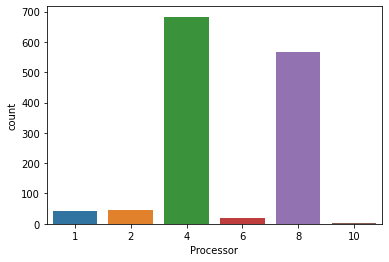

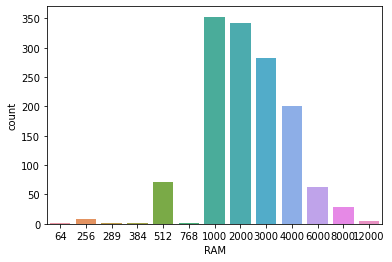

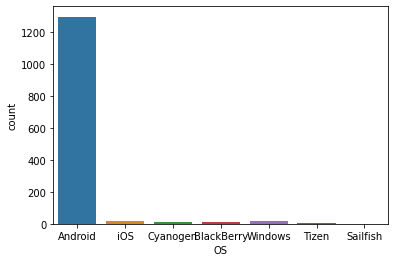

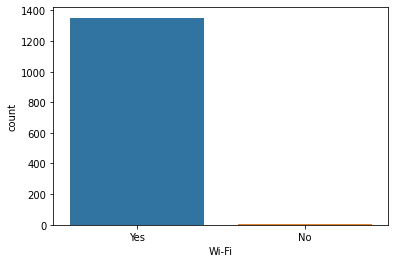

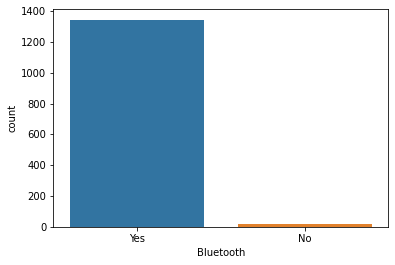

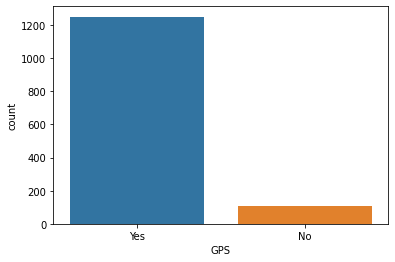

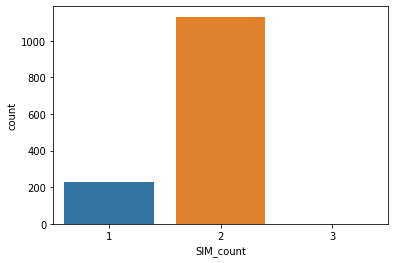

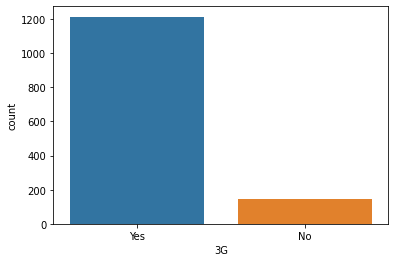

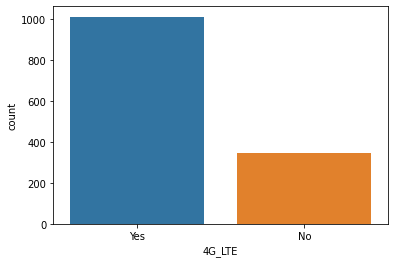

In [105]:
dis_col = ['Brand', 'Touchscreen', 'Processor', 'RAM', 'OS', 'Wi-Fi', 'Bluetooth', 'GPS', 'SIM_count','3G', '4G_LTE']
for col in dis_col:
    sns.countplot(data=df, x=col)
    plt.show()


#### distplot - for continuous features

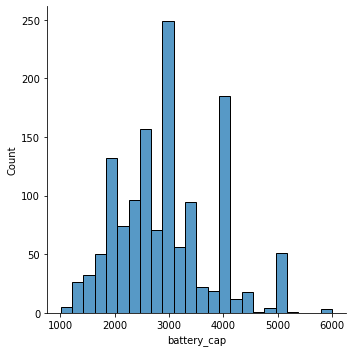

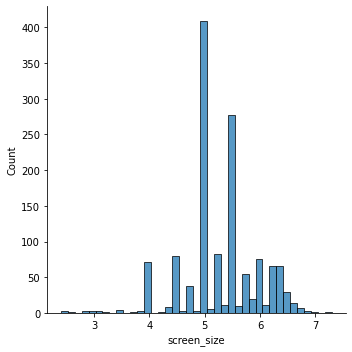

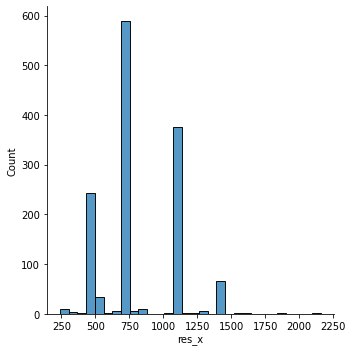

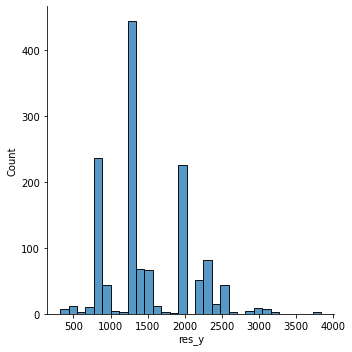

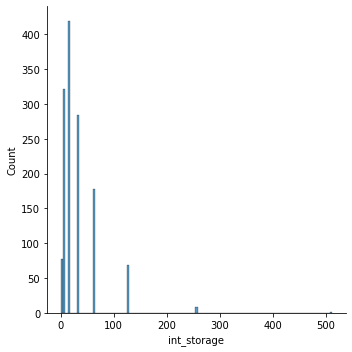

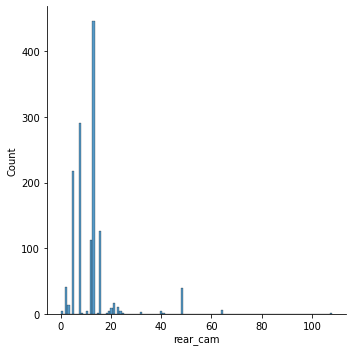

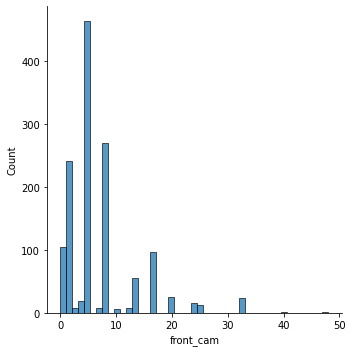

In [106]:
cont_col = ['battery_cap', 'screen_size','res_x', 'res_y', 'int_storage', 'rear_cam', 'front_cam']
for col in cont_col:
    sns.displot(data=df, x=col)
    plt.show()

        

In [107]:
np.where(df['int_storage'] > 256)

(array([651]),)

In [108]:
df.iloc[651]

# Note : There is only one phone that exceeds 256 GB internal storage with 512 GB internal storage
#        Since smartphones with 512 GB internal storage is available in the market this is not treated as an outlier

Brand              Samsung
Model          Galaxy Fold
battery_cap           4380
screen_size            7.3
Touchscreen            Yes
res_x                 1536
res_y                 2152
Processor                8
RAM                  12000
int_storage          512.0
rear_cam              16.0
front_cam             10.0
OS                 Android
Wi-Fi                  Yes
Bluetooth              Yes
GPS                    Yes
SIM_count                2
3G                     Yes
4G_LTE                 Yes
Price               164999
Name: 651, dtype: object

In [109]:
# Investigting column 'rear_cam'       
n = len(pd.unique(df['rear_cam' ]))
print(f"Number of unique valus in column 'rear_cam'  {n}")  

# Unique Model
df['rear_cam' ].unique()


Number of unique valus in column 'rear_cam'  32


array([ 48. ,  64. ,  12. ,  16. ,  40. ,  12.2,  13. ,  12.3,  23. ,
        21. ,  32. ,  24. ,  20. ,  19. ,   2. ,  18. ,   8. ,  20.7,
         5. ,  10. ,  13.1,   8.7,   3. ,  41. ,   3.2, 108. ,  25. ,
         0. ,  21.5,   0.3,  15. ,  13.2])

In [110]:
df['rear_cam'].min(), df['rear_cam'].max(), df['rear_cam'].mean(), df['rear_cam'].median()

(0.0, 108.0, 12.07019867549669, 12.2)

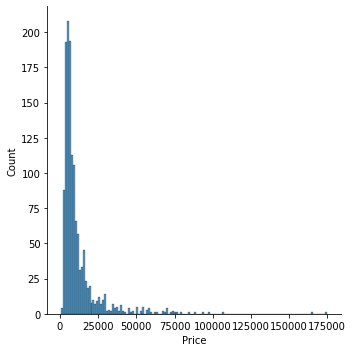

In [111]:
# Price - continuous
sns.displot(df['Price'])

### 2.4 Pairplot analysis

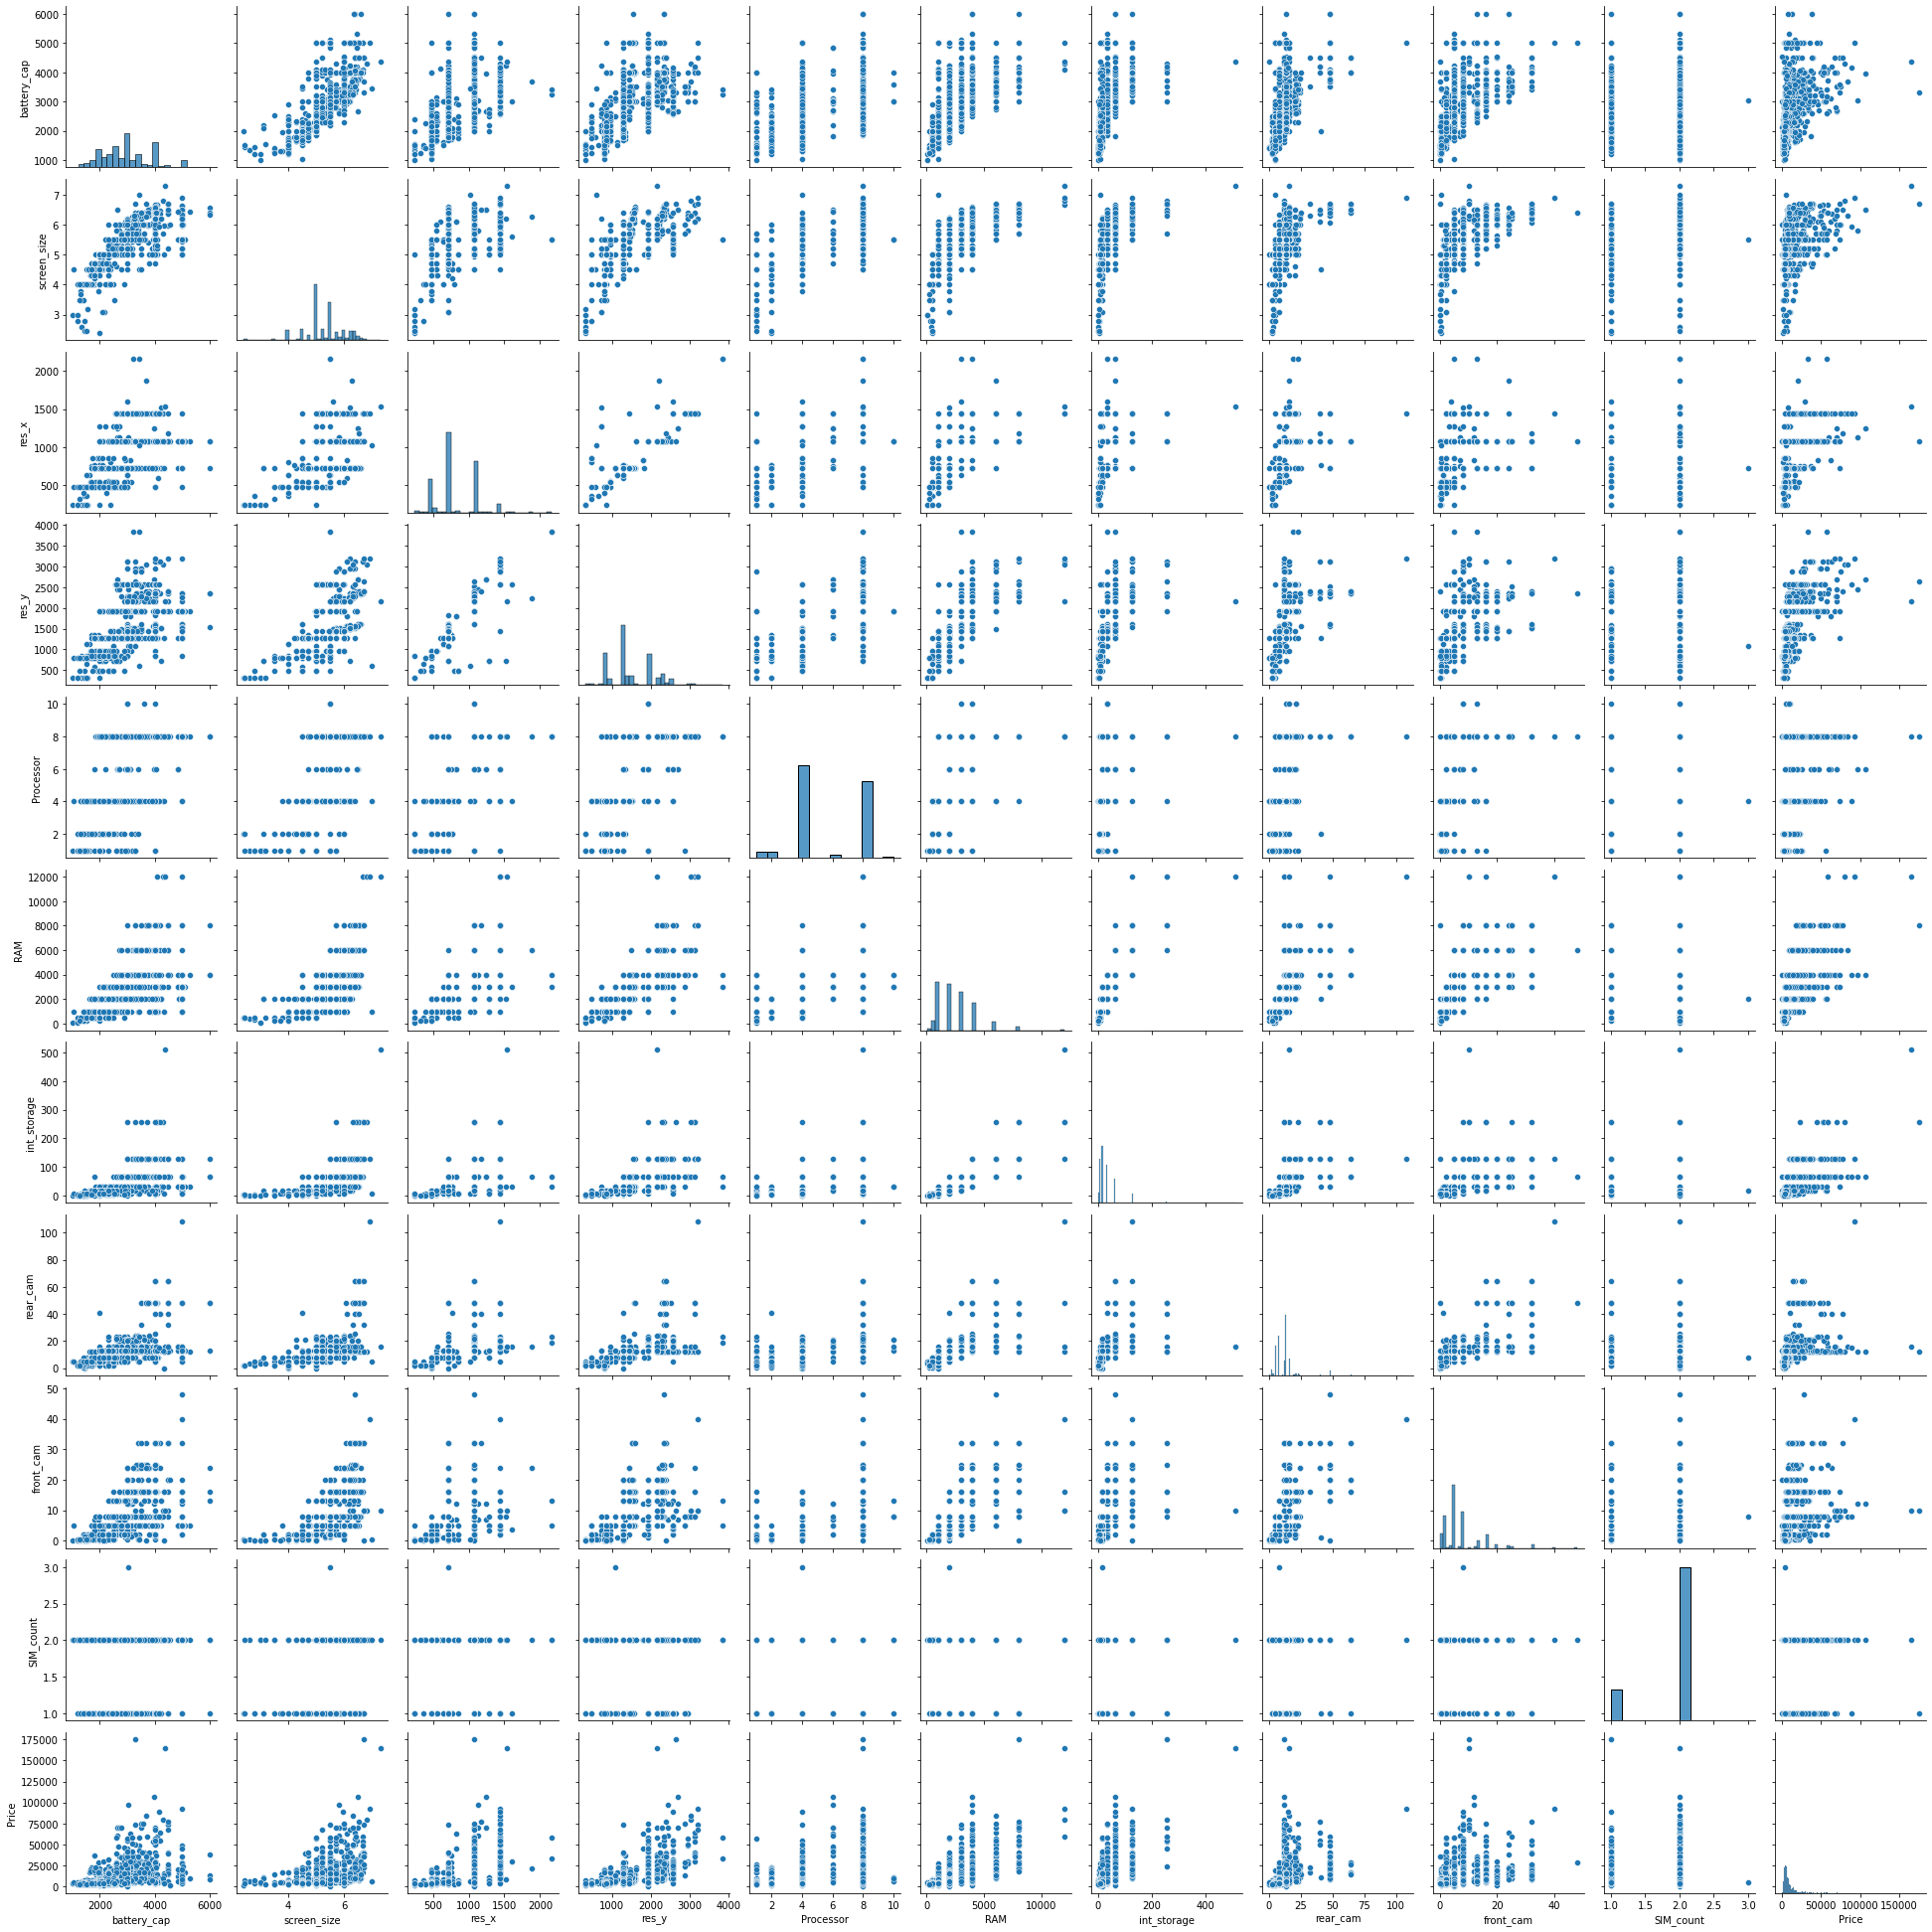

In [112]:
sns.pairplot(df)
plt.show()

In [113]:
df.columns

Index(['Brand', 'Model', 'battery_cap', 'screen_size', 'Touchscreen', 'res_x',
       'res_y', 'Processor', 'RAM', 'int_storage', 'rear_cam', 'front_cam',
       'OS', 'Wi-Fi', 'Bluetooth', 'GPS', 'SIM_count', '3G', '4G_LTE',
       'Price'],
      dtype='object')

### 2.5 Multivariate analysis

#### boxplots for discrete features

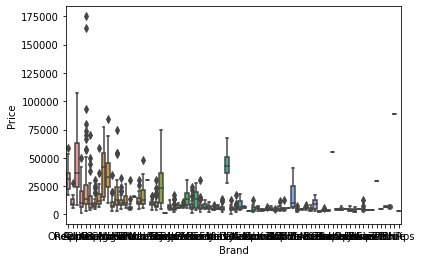

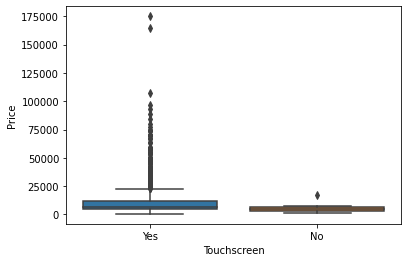

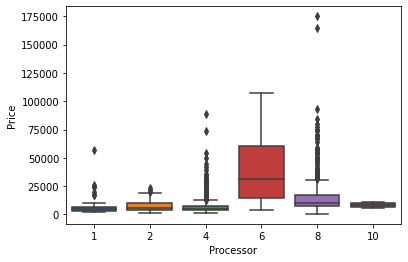

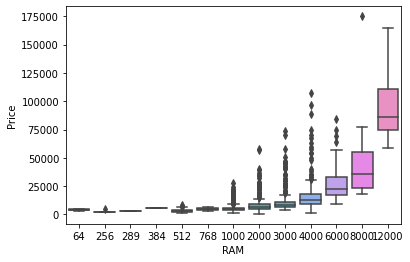

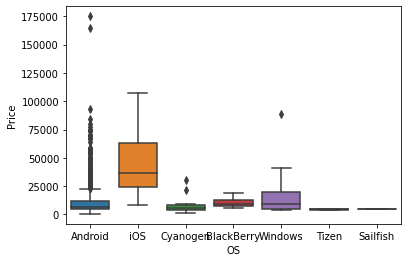

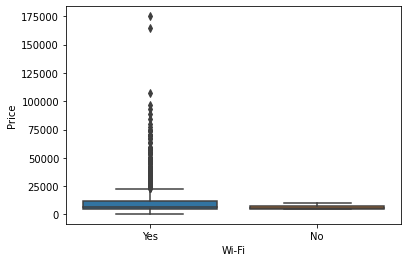

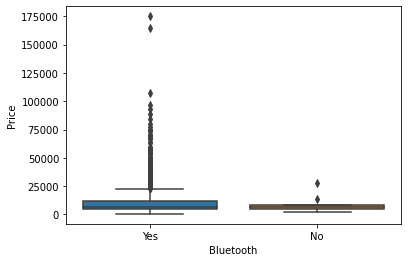

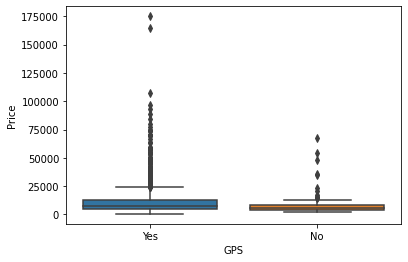

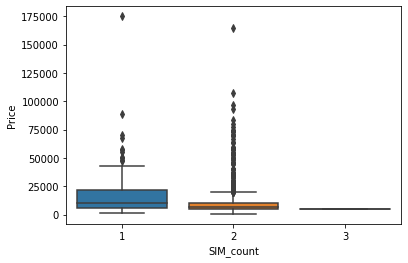

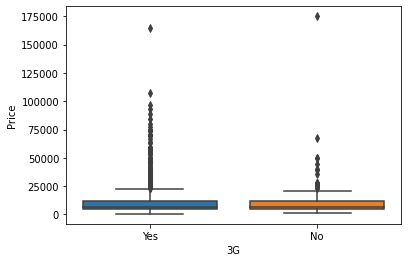

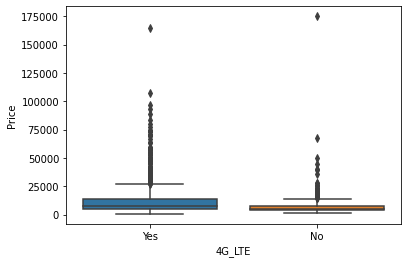

In [114]:
for col in dis_col:
    sns.boxplot(x = df[col], y=df['Price'])
    plt.show()
    
# Note: By analysing the boxplots out of the discreate features in case of 'Processor', 'RAM', and 'OS' we can observer a trend with respect to 'Price'.
#       Thus 'Processor', 'RAM', and 'OS' will be selected to train the models.

In [115]:
df.columns

Index(['Brand', 'Model', 'battery_cap', 'screen_size', 'Touchscreen', 'res_x',
       'res_y', 'Processor', 'RAM', 'int_storage', 'rear_cam', 'front_cam',
       'OS', 'Wi-Fi', 'Bluetooth', 'GPS', 'SIM_count', '3G', '4G_LTE',
       'Price'],
      dtype='object')

#### scatterplots for continuous features

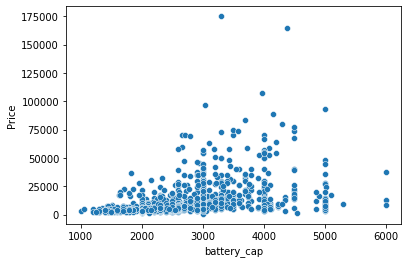

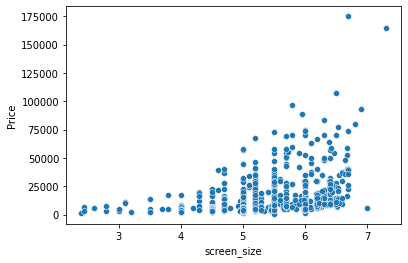

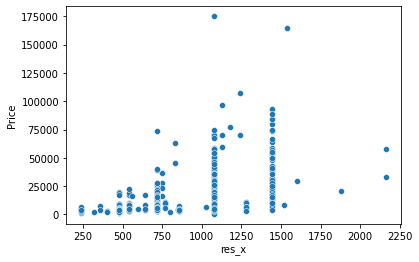

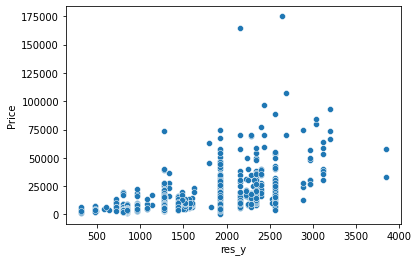

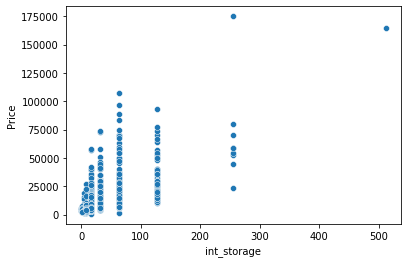

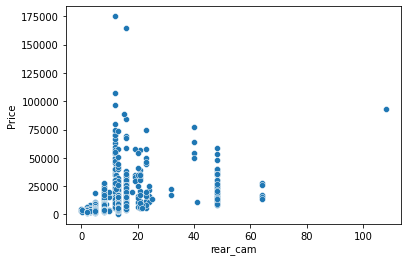

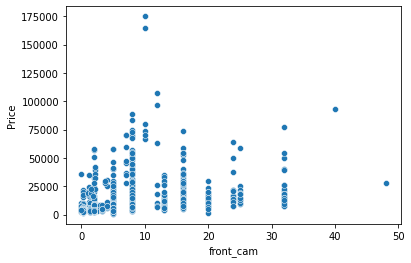

In [116]:
for col in cont_col:
    sns.scatterplot(x = df[col], y=df['Price'])
    plt.show()
    
# Note: By analysing the scatterplots and the heatmap out of the continuous features in case of 'res_x', 'res_y', 'int_storage' 
#       we can see a high correlation to the 'Price'. But between 'res_x', 'res_y' there is a very high corelation thus only 'res_y'
#       will be used in training the models.
#       From continuous features only 'res_y', 'int_storage' will be selected to train the models.

<AxesSubplot:>

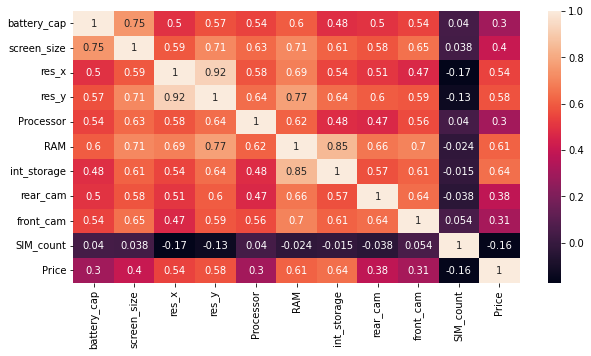

In [117]:
# Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [119]:
df['Processor'].value_counts()

4     683
8     565
2      45
1      42
6      20
10      4
Name: Processor, dtype: int64

In [120]:
df['RAM'].value_counts()

1000     353
2000     342
3000     282
4000     200
512       72
6000      63
8000      29
256        8
12000      4
64         2
768        2
384        1
289        1
Name: RAM, dtype: int64

In [121]:
df['OS'].value_counts()

Android       1299
Windows         19
iOS             17
Cyanogen        10
BlackBerry      10
Tizen            3
Sailfish         1
Name: OS, dtype: int64

#### 2.6 Feature selection
- By analysing the boxplots out of the discreate features in case of 'Processor', 'RAM', and 'OS' we can observer a trend with respect to 'Price'.
- But in-case of 'OS' 1299/1359 samples has Android as the OS, and samples available for other OS types is few. Thus 'OS' will not be considerd.
- By analysing the scatterplots and the heatmap out of the continuous features in case of 'res_x', 'res_y', 'int_storage' we can see a high correlation to the 'Price'. 
- But between 'res_x', 'res_y' there is a very high corelation thus only 'res_y' will be used in training the models.
- Selection of features to predict the price:
    - Processor
    - RAM
    - res_y
    - int_storage

In [123]:
#Set the X and y

X = df[['Processor', 'RAM', 'res_y',  'int_storage']]

y = df['Price']

X.shape, y.shape

((1359, 4), (1359,))

## 3. Test-Train Split

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=999)

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((951, 4), (408, 4), (951,), (408,))

## 4. Preprocessing / Cleaning

### 4.1 Convert strings to numbers (float/int)
- All features selected for X are numerical, thus not converted

In [376]:
# #1. import the library
# from sklearn.preprocessing import OneHotEncoder

# #2. create the object
# ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# #3. fit and transform
# df['os_en'] = ohe.fit_transform(df['OS'].values.reshape(-1,1))

### 4.2 Fixing Missing Values
- Note: Dataset selected for X has no missing values

In [126]:
X_train.isna().sum()

Processor      0
RAM            0
res_y          0
int_storage    0
dtype: int64

In [127]:
X_test.isna().sum()

Processor      0
RAM            0
res_y          0
int_storage    0
dtype: int64

### 4.3 Standardizing

In [141]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [142]:
X_train[1:5]

array([[-0.70085193,  0.31782113, -0.3791064 ,  0.05052075],
       [ 1.12021415,  2.1437577 ,  1.39220125,  2.91407774],
       [ 1.12021415,  0.92646665,  1.17964433,  1.00503975],
       [-0.70085193, -0.89946993, -0.3791064 , -0.42673874]])

In [143]:
X_test[1:5]

array([[ 1.12021415,  0.31782113,  0.75453049,  0.05052075],
       [ 1.12021415,  0.92646665,  0.04600743,  1.00503975],
       [-0.70085193, -0.89946993, -0.3791064 , -0.66536849],
       [ 1.12021415,  0.31782113,  0.75453049,  0.05052075]])

In [144]:
y_train[1:5]

781     5490
129    16990
34     12000
711     3899
Name: Price, dtype: int64

In [145]:
y_test[1:5]

974     7599
592     6999
763     3799
216    26499
Name: Price, dtype: int64